In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import (
    read_csv_files, filter_nodes, convert_dates_to_datetime,
    add_holidays,add_weather_data,set_indexes_for_timeseries,
    get_train_test
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [24]:
DATA_DIR = './data'
filenames = ['champs-elysees.csv', 'convention.csv', 'saints-peres.csv']
dfs = read_csv_files(DATA_DIR, filenames)

In [25]:
TIME_WINDOW = 14

In [26]:
df = pd.concat(dfs)
df.head()

,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,filename
ds,,,,,,,,,,,,,,
2021-11-01T04:00:00+01:00,AV_Champs_Elysees,1222.0,42.87945,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]...",champs-elysees.csv
2021-11-01T05:00:00+01:00,AV_Champs_Elysees,1033.0,44.35278,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]...",champs-elysees.csv
2021-11-01T06:00:00+01:00,AV_Champs_Elysees,824.0,20.16222,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]...",champs-elysees.csv
2021-11-01T07:00:00+01:00,AV_Champs_Elysees,710.0,12.20000,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]...",champs-elysees.csv
2021-11-01T08:00:00+01:00,AV_Champs_Elysees,947.0,40.57222,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]...",champs-elysees.csv


In [27]:
df.isna().sum()

Libelle                    0
Débit horaire              0
Taux d'occupation          0
Etat trafic                0
Identifiant noeud amont    0
Libelle noeud amont        0
Identifiant noeud aval     0
Libelle noeud aval         0
Etat arc                   0
Date debut dispo data      0
Date fin dispo data        0
geo_point_2d               0
geo_shape                  0
filename                   0
dtype: int64

In [28]:
df_filtered = filter_nodes(df)

In [29]:
df_filtered.shape

(27404, 14)

In [30]:
df_filtered = df_filtered.drop(['Libelle noeud amont','Libelle noeud aval'],axis=1)

In [31]:
df_filtered.shape

(27404, 12)

In [32]:
df_filtered = convert_dates_to_datetime(df_filtered,'Date et heure de comptage')
print(df_filtered['Date et heure de comptage'])

ds
2021-11-01T04:00:00+01:00   2021-11-01 04:00:00
2021-11-01T05:00:00+01:00   2021-11-01 05:00:00
2021-11-01T06:00:00+01:00   2021-11-01 06:00:00
2021-11-01T07:00:00+01:00   2021-11-01 07:00:00
2021-11-01T08:00:00+01:00   2021-11-01 08:00:00
                                    ...        
2022-12-01T20:00:00+01:00   2022-12-01 20:00:00
2022-12-01T21:00:00+01:00   2022-12-01 21:00:00
2022-12-01T22:00:00+01:00   2022-12-01 22:00:00
2022-12-01T23:00:00+01:00   2022-12-01 23:00:00
2022-12-02T00:00:00+01:00   2022-12-02 00:00:00
Name: Date et heure de comptage, Length: 27404, dtype: datetime64[ns]


<AxesSubplot: xlabel='ds'>

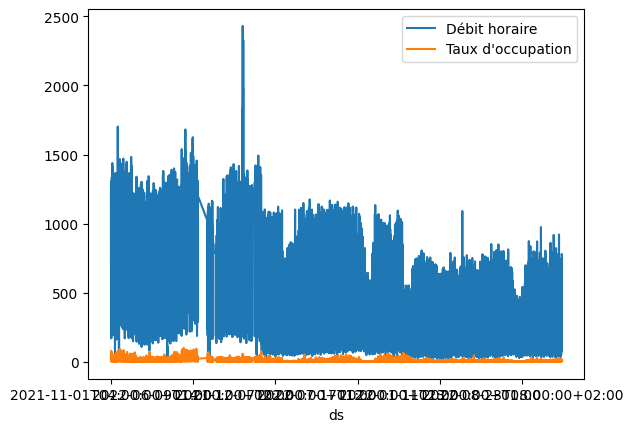

In [33]:

df_filtered[['Débit horaire', "Taux d'occupation"]].plot()

<AxesSubplot: >

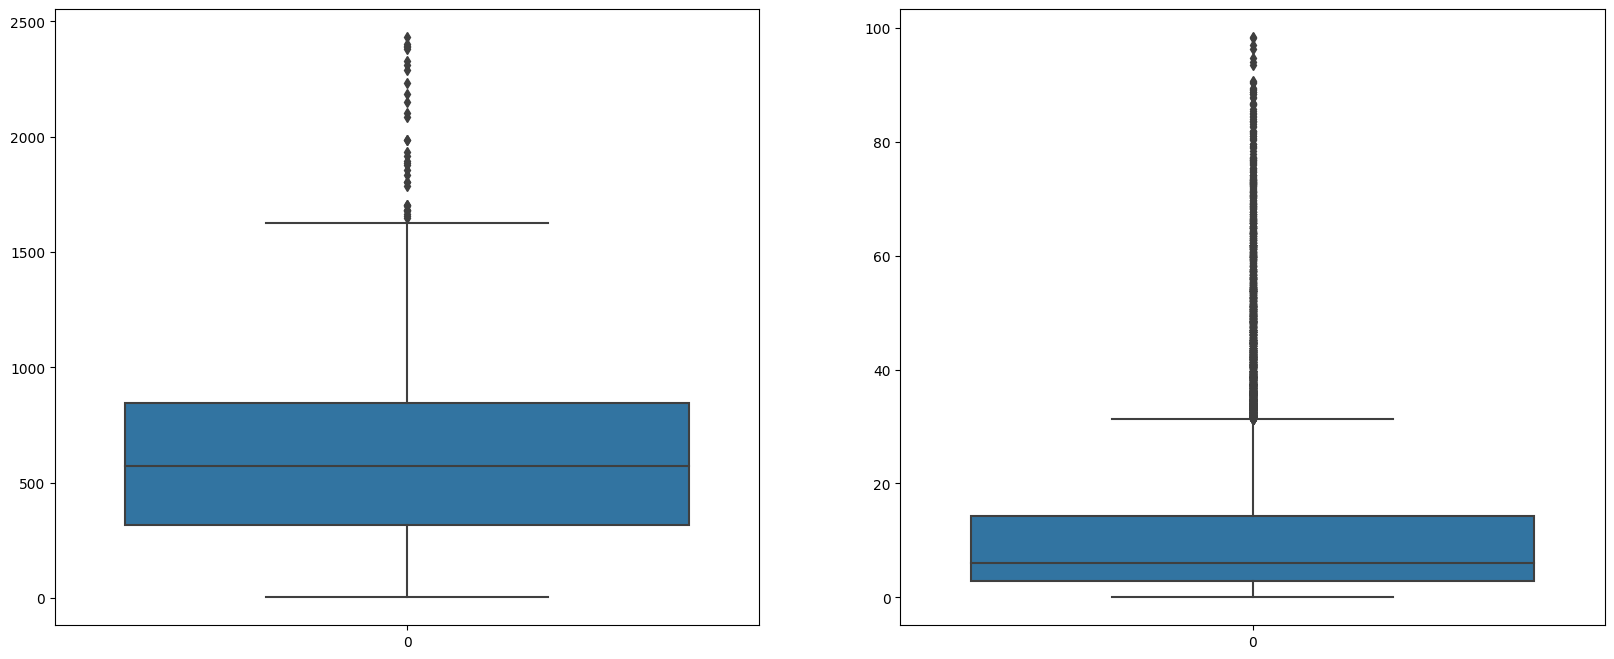

In [34]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
sns.boxplot(df_filtered['Débit horaire'])

plt.subplot(1, 2, 2)
sns.boxplot(df_filtered["Taux d'occupation"])

In [35]:
df_filtered['Jour de la semaine'] = pd.to_datetime(df_filtered["Date et heure de comptage"]).dt.dayofweek
df_filtered = pd.concat([
    df_filtered,
    pd.get_dummies(df_filtered['Jour de la semaine'],prefix='Jour de la semaine')
], axis=1).drop(columns=['Jour de la semaine'])

df_filtered.sample(10)

,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Identifiant noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,filename,Date et heure de comptage,Jour de la semaine_0,Jour de la semaine_1,Jour de la semaine_2,Jour de la semaine_3,Jour de la semaine_4,Jour de la semaine_5,Jour de la semaine_6
ds,,,,,,,,,,,,,,,,,,,,
2022-11-15T02:00:00+01:00,Sts_Peres,108.000000,1.44222,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.332454190717672","{""coordinates"": [[2.3332577811223216, 48.85826...",saints-peres.csv,2022-11-15 02:00:00,0,1,0,0,0,0,0
2022-11-16T06:00:00+01:00,Convention,29.666667,0.72389,Fluide,2937,2973,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.293205602717535","{""coordinates"": [[2.2918783062727064, 48.83923...",convention.csv,2022-11-16 06:00:00,0,0,1,0,0,0,0
2022-09-30T11:00:00+02:00,Sts_Peres,656.000000,11.43722,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.332454190717672","{""coordinates"": [[2.3332577811223216, 48.85826...",saints-peres.csv,2022-09-30 10:00:00,0,0,0,0,1,0,0
2022-05-25T17:00:00+02:00,Sts_Peres,626.000000,8.75278,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.3324541907176717","{""coordinates"": [[2.3332577811, 48.858260067],...",saints-peres.csv,2022-05-25 16:00:00,0,0,1,0,0,0,0
2022-04-19T08:00:00+02:00,Sts_Peres,360.000000,4.34889,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.3324541907176717","{""coordinates"": [[2.3332577811, 48.858260067],...",saints-peres.csv,2022-04-19 07:00:00,0,1,0,0,0,0,0
2022-01-19T05:00:00+01:00,Sts_Peres,47.000000,0.67111,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.3324541907176717","{""coordinates"": [[2.3332577811, 48.858260067],...",saints-peres.csv,2022-01-19 05:00:00,0,0,1,0,0,0,0
2021-12-24T14:00:00+01:00,Sts_Peres,471.000000,6.42445,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.3324541907176717","{""coordinates"": [[2.3332577811, 48.858260067],...",saints-peres.csv,2021-12-24 14:00:00,0,0,0,0,1,0,0
2022-01-19T19:00:00+01:00,Convention,770.000000,6.32833,Fluide,2937,2973,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.2932056027175345","{""coordinates"": [[2.2918783063, 48.8392381071]...",convention.csv,2022-01-19 19:00:00,0,0,1,0,0,0,0
2022-01-24T01:00:00+01:00,Convention,159.000000,0.96000,Fluide,2937,2973,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.2932056027175345","{""coordinates"": [[2.2918783063, 48.8392381071]...",convention.csv,2022-01-24 01:00:00,1,0,0,0,0,0,0


In [36]:
df_filtered['Date'] = pd.to_datetime(df_filtered["Date et heure de comptage"]).dt.date

In [37]:
add_holidays(df_filtered,DATA_DIR)

In [38]:
df_filtered[df_filtered["Vacances scolaires"]==True]

,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Identifiant noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,...,Jour de la semaine_2,Jour de la semaine_3,Jour de la semaine_4,Jour de la semaine_5,Jour de la semaine_6,Date,Jour férié,Vacances scolaires,Prochaines vacances scolaires,Durée avant les prochaines vacances scolaires
ds,,,,,,,,,,,,,,,,,,,,,
2021-11-01T04:00:00+01:00,AV_Champs_Elysees,1222.0,42.87945,Saturé,2294,2293,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062",...,0,0,0,0,0,2021-11-01,True,True,2021-12-18,46 days 20:00:00
2021-11-01T05:00:00+01:00,AV_Champs_Elysees,1033.0,44.35278,Saturé,2294,2293,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062",...,0,0,0,0,0,2021-11-01,True,True,2021-12-18,46 days 19:00:00
2021-11-01T06:00:00+01:00,AV_Champs_Elysees,824.0,20.16222,Pré-saturé,2294,2293,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062",...,0,0,0,0,0,2021-11-01,True,True,2021-12-18,46 days 18:00:00
2021-11-01T07:00:00+01:00,AV_Champs_Elysees,710.0,12.20000,Fluide,2294,2293,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062",...,0,0,0,0,0,2021-11-01,True,True,2021-12-18,46 days 17:00:00
2021-11-01T08:00:00+01:00,AV_Champs_Elysees,947.0,40.57222,Saturé,2294,2293,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062",...,0,0,0,0,0,2021-11-01,True,True,2021-12-18,46 days 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-07T19:00:00+01:00,Sts_Peres,635.0,8.34889,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.332454190717672",...,0,0,0,0,0,2022-11-07,False,True,2022-12-17,39 days 05:00:00
2022-11-07T20:00:00+01:00,Sts_Peres,650.0,8.05389,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.332454190717672",...,0,0,0,0,0,2022-11-07,False,True,2022-12-17,39 days 04:00:00
2022-11-07T21:00:00+01:00,Sts_Peres,536.0,6.84889,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.332454190717672",...,0,0,0,0,0,2022-11-07,False,True,2022-12-17,39 days 03:00:00


In [39]:
df_filtered.dtypes

Libelle                                                   object
Débit horaire                                            float64
Taux d'occupation                                        float64
Etat trafic                                               object
Identifiant noeud amont                                    int64
Identifiant noeud aval                                     int64
Etat arc                                                  object
Date debut dispo data                                     object
Date fin dispo data                                       object
geo_point_2d                                              object
geo_shape                                                 object
filename                                                  object
Date et heure de comptage                         datetime64[ns]
Jour de la semaine_0                                       uint8
Jour de la semaine_1                                       uint8
Jour de la semaine_2     

In [40]:
df_filtered = add_weather_data(df_filtered,DATA_DIR)

In [41]:
df_filtered.sample(10)

,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Identifiant noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
15566,Convention,168.000000,0.665000,Fluide,2937,2973,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.2932056027175345",...,26.0,4.0,40.0,0.0,1022.0,23.0,10.0,28.0,16.0,Paris
5413,AV_Champs_Elysees,1161.916955,24.436119,Inconnu,2294,2293,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062",...,10.0,12.0,30.0,0.0,1011.0,28.0,10.0,192.0,9.0,Paris
23000,Sts_Peres,367.000000,4.246670,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.3324541907176717",...,21.0,4.0,69.0,0.0,1022.0,11.0,10.0,26.0,14.0,Paris
26822,Sts_Peres,223.000000,2.801110,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.332454190717672",...,28.0,96.0,87.0,0.0,1015.0,11.0,10.0,210.0,19.0,Paris
18466,Sts_Peres,605.000000,9.351670,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.3324541907176717",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16314,Convention,138.000000,0.632780,Fluide,2937,2973,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.2932056027175345",...,23.0,74.0,78.0,0.0,1015.0,15.0,10.0,246.0,16.0,Paris
16854,Convention,771.000000,6.026110,Fluide,2937,2973,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.293205602717535",...,31.0,21.0,56.0,0.0,1017.0,22.0,10.0,244.0,27.0,Paris
10782,Convention,753.000000,5.461670,Fluide,2937,2973,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.2932056027175345",...,43.0,100.0,84.0,0.3,1004.0,10.0,7.0,228.0,32.0,Paris
3516,AV_Champs_Elysees,664.000000,5.898330,Fluide,2294,2293,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062",...,44.0,100.0,74.0,0.0,999.0,10.0,10.0,234.0,30.0,Paris
16801,Convention,827.000000,9.458890,Fluide,2937,2973,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.293205602717535",...,2.0,3.0,37.0,0.0,1011.0,19.0,10.0,345.0,2.0,Paris


/tmp/ipykernel_5500/418781159.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_filtered.corr()


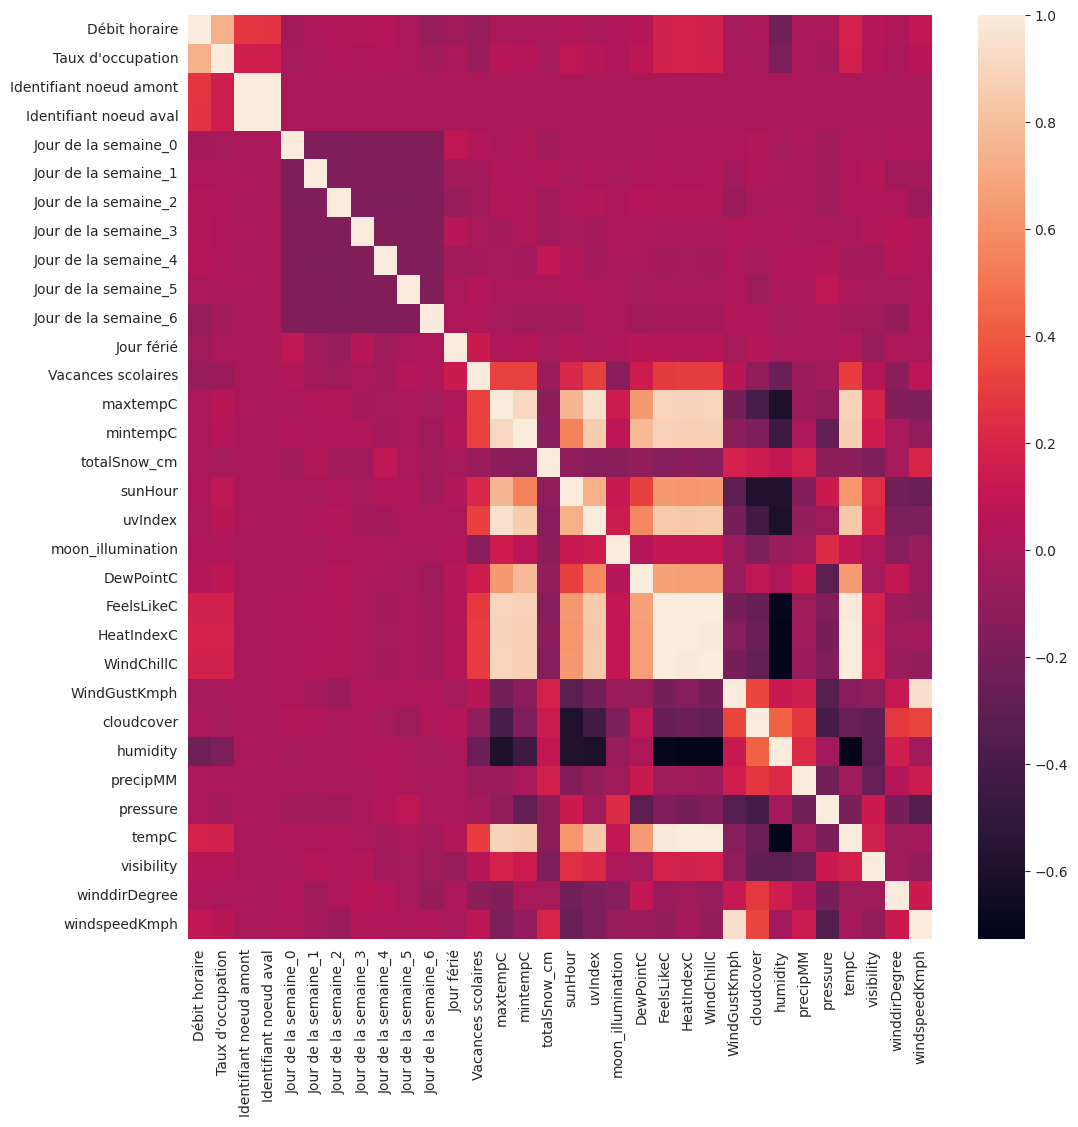

In [42]:
corr_matrix = df_filtered.corr()
with sns.axes_style("white"):
    plt.figure(figsize=(12,12))
    ax = sns.heatmap(corr_matrix)


In [43]:
traffic_state_encoding = {"Inconnu":0, "Fluide":1, "Pré-saturé":2, "Saturé":3, "Bloqué":4}
df_filtered["Etat trafic"] = df_filtered["Etat trafic"].map(traffic_state_encoding)

In [45]:
df_train, df_test = get_train_test(df_filtered)

In [50]:
df_train_ce = df_train[df_train['filename']=='champs-elysees.csv']
df_train_sts = df_train[df_train['filename']=='saints-peres.csv']
df_train_conv = df_train[df_train['filename']=='convention.csv']

df_test_ce = df_test[df_test['filename']=='champs-elysees.csv']
df_test_sts = df_test[df_test['filename']=='saints-peres.csv']
df_test_conv = df_test[df_test['filename']=='convention.csv']

In [51]:
dfs_train = [df_train_ce,df_train_sts,df_train_conv]
dfs_test = [df_test_ce,df_test_sts,df_test_conv]

for df in dfs_train+dfs_test :
    df = set_indexes_for_timeseries(df)


## Moyenne mobile du débit horaire sur fenêtre de 24h

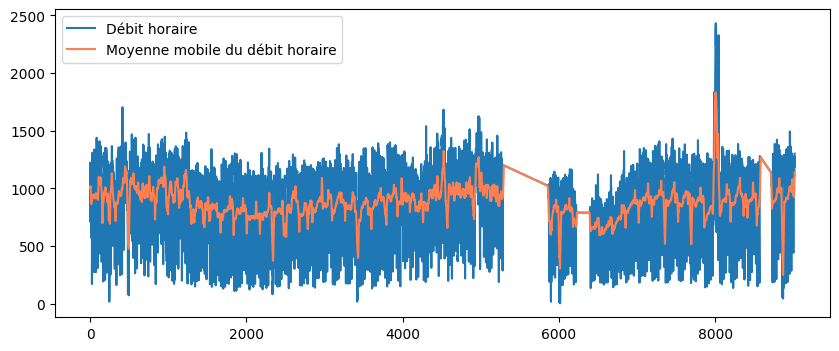

In [52]:
mobile_mean = df_train_ce['Débit horaire'].rolling(24, center=True, min_periods=1).mean()
df_train_ce['Débit horaire'].plot(figsize=(10,4), label = 'Débit horaire')
mobile_mean.plot(figsize=(10,4), color='coral', label = 'Moyenne mobile du débit horaire')
plt.legend()
plt.show()

## Moyenne mobile du taux d'occupation sur fenêtre de 24h

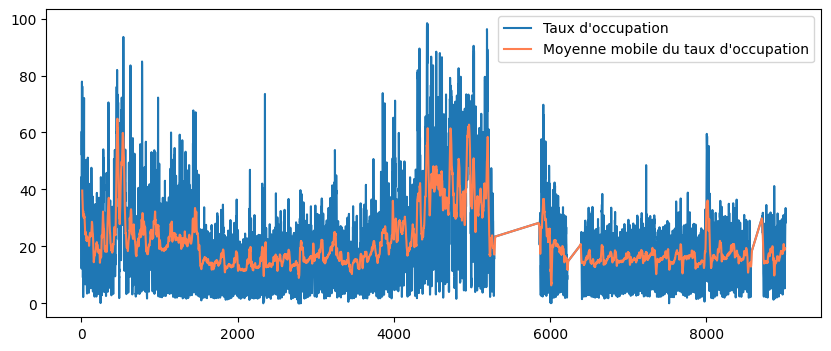

In [53]:
mobile_mean_to = df_train_ce["Taux d'occupation"].rolling(24, center=True).mean()
df_train_ce["Taux d'occupation"].plot(figsize=(10,4), label = "Taux d'occupation")
mobile_mean_to.plot(figsize=(10,4), color='coral', label = "Moyenne mobile du taux d'occupation")
plt.legend()
plt.show()

## Grid search sur les paramètres de SARIMA

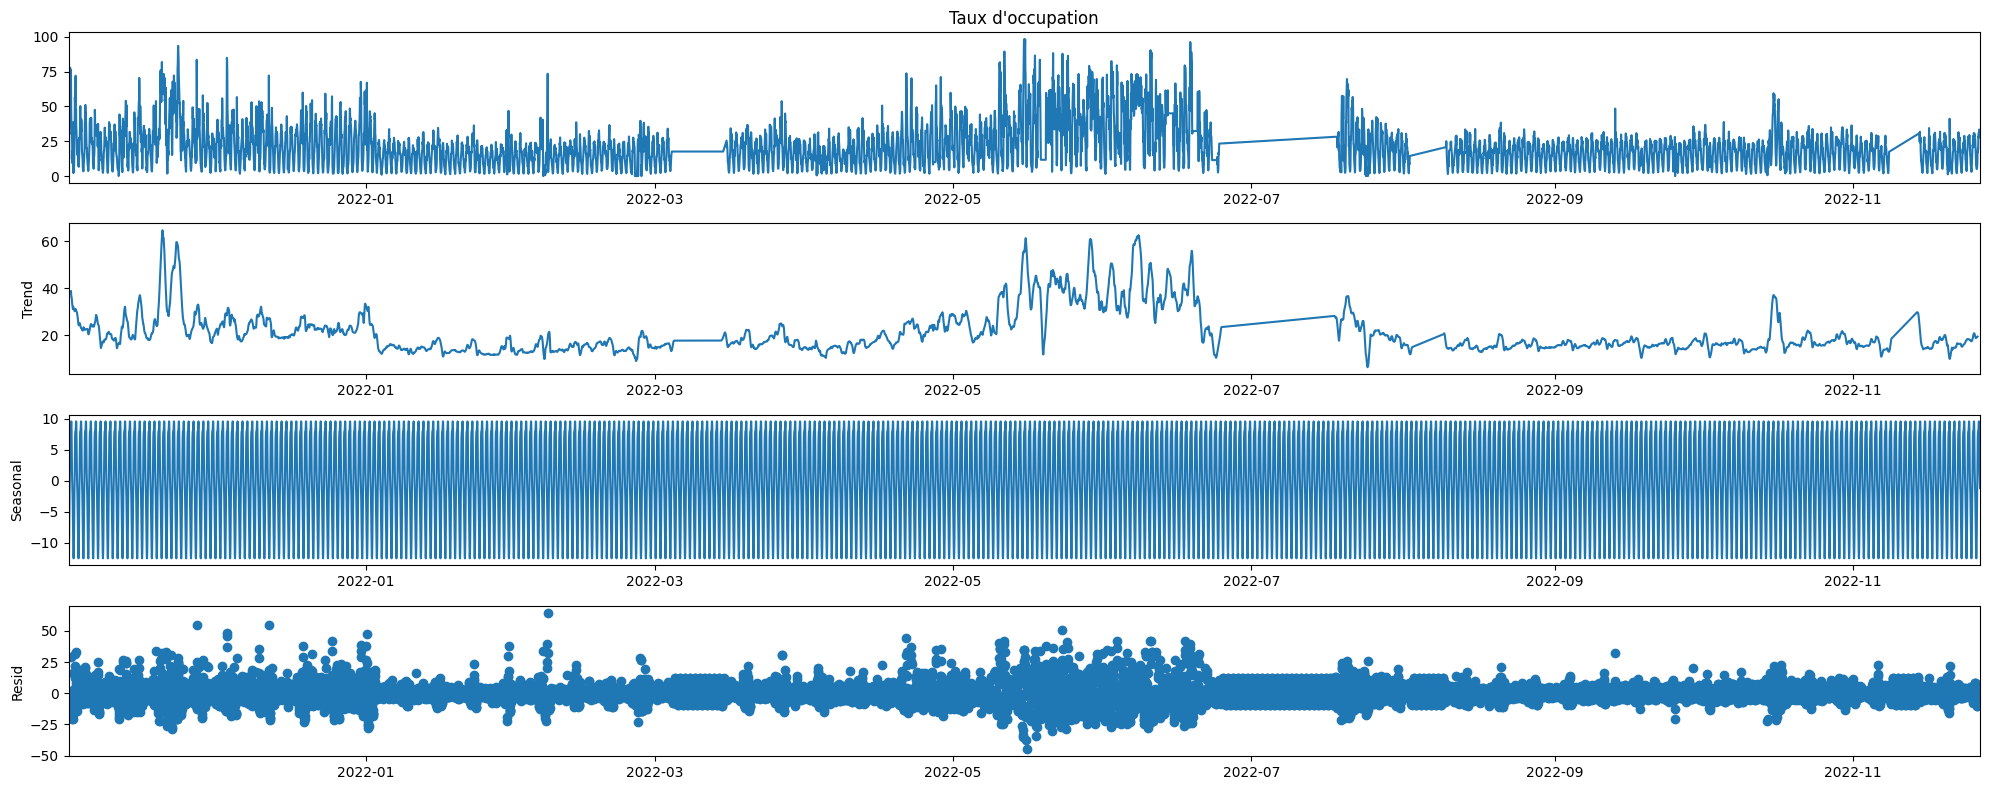

In [57]:
plt.rcParams["figure.figsize"] = (20,8)
decomposition = sm.tsa.seasonal_decompose(df_train_ce["Taux d'occupation"], model='additive')
fig = decomposition.plot()
plt.show()


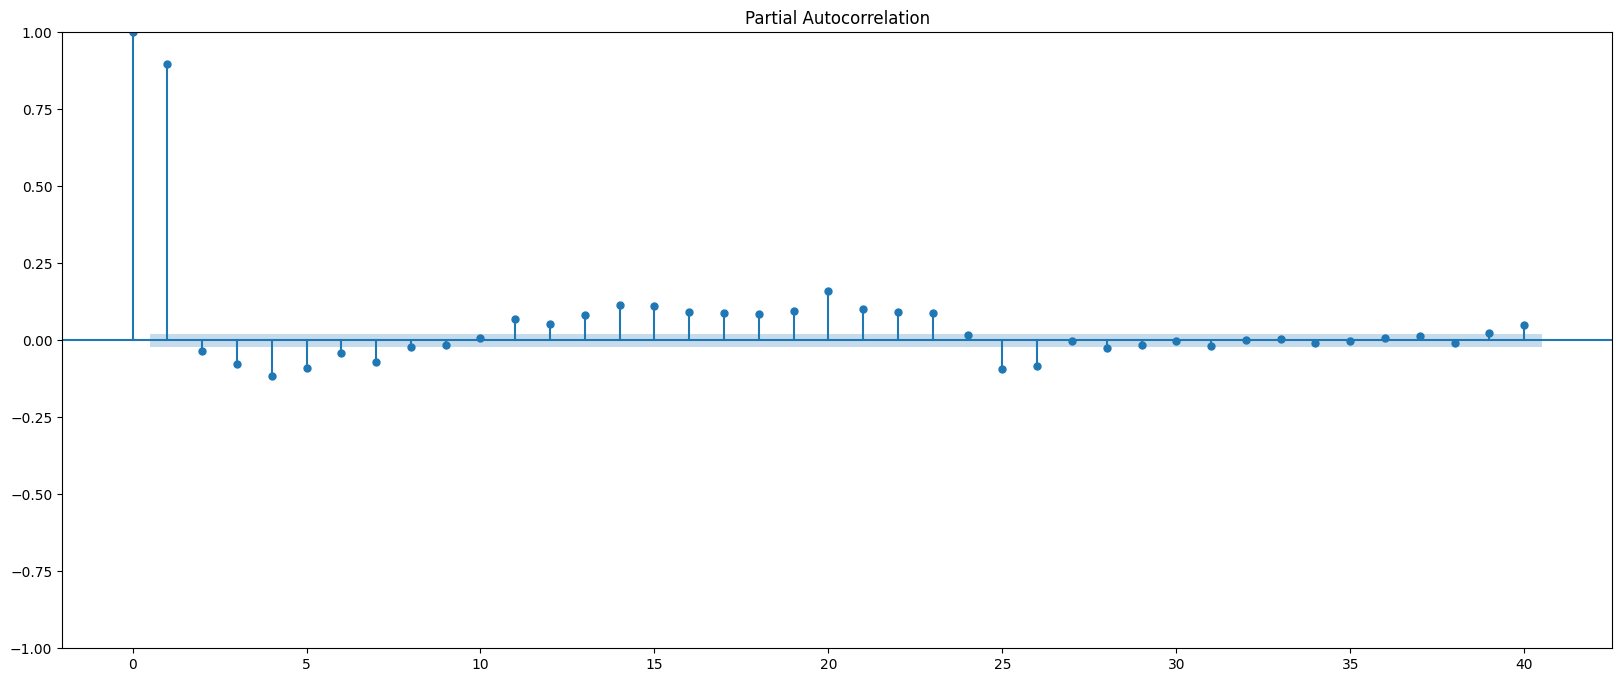

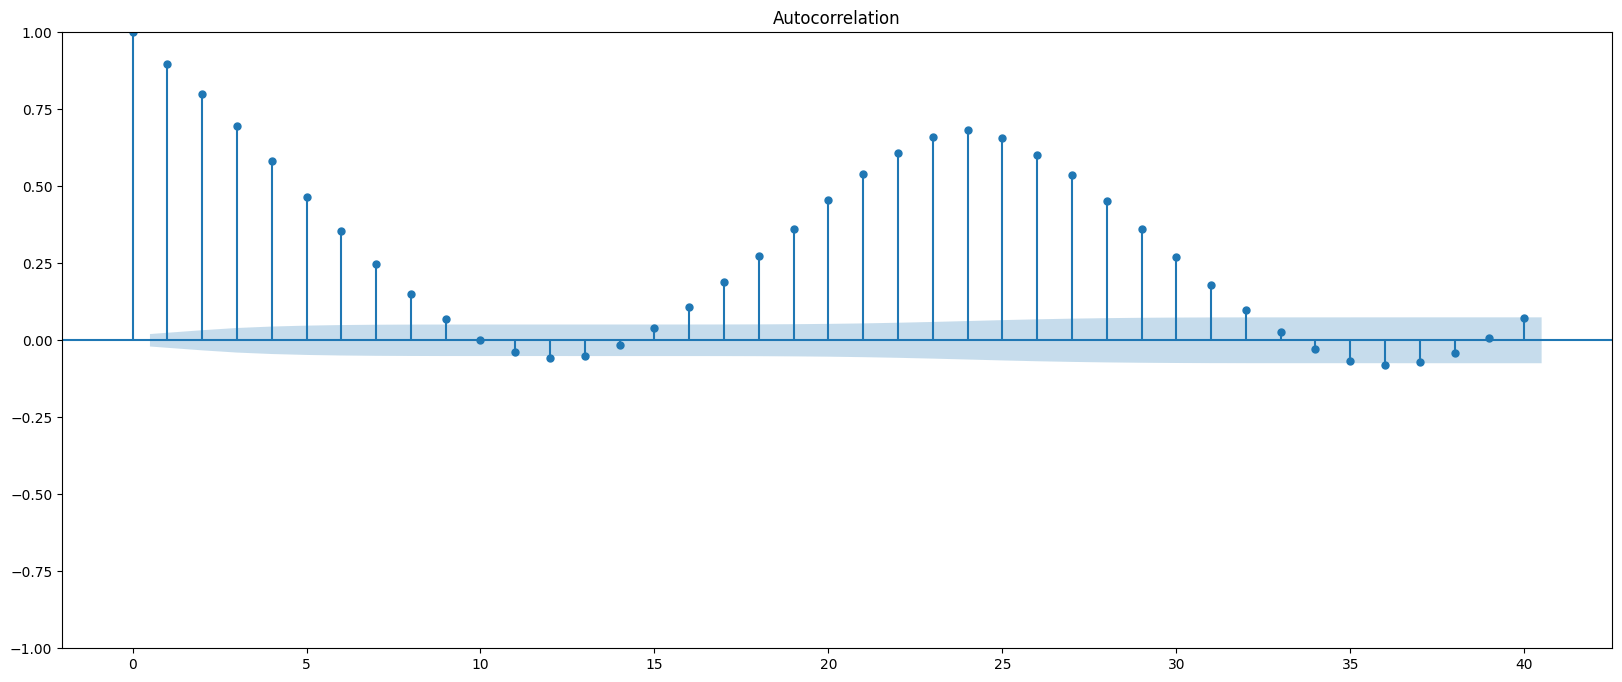

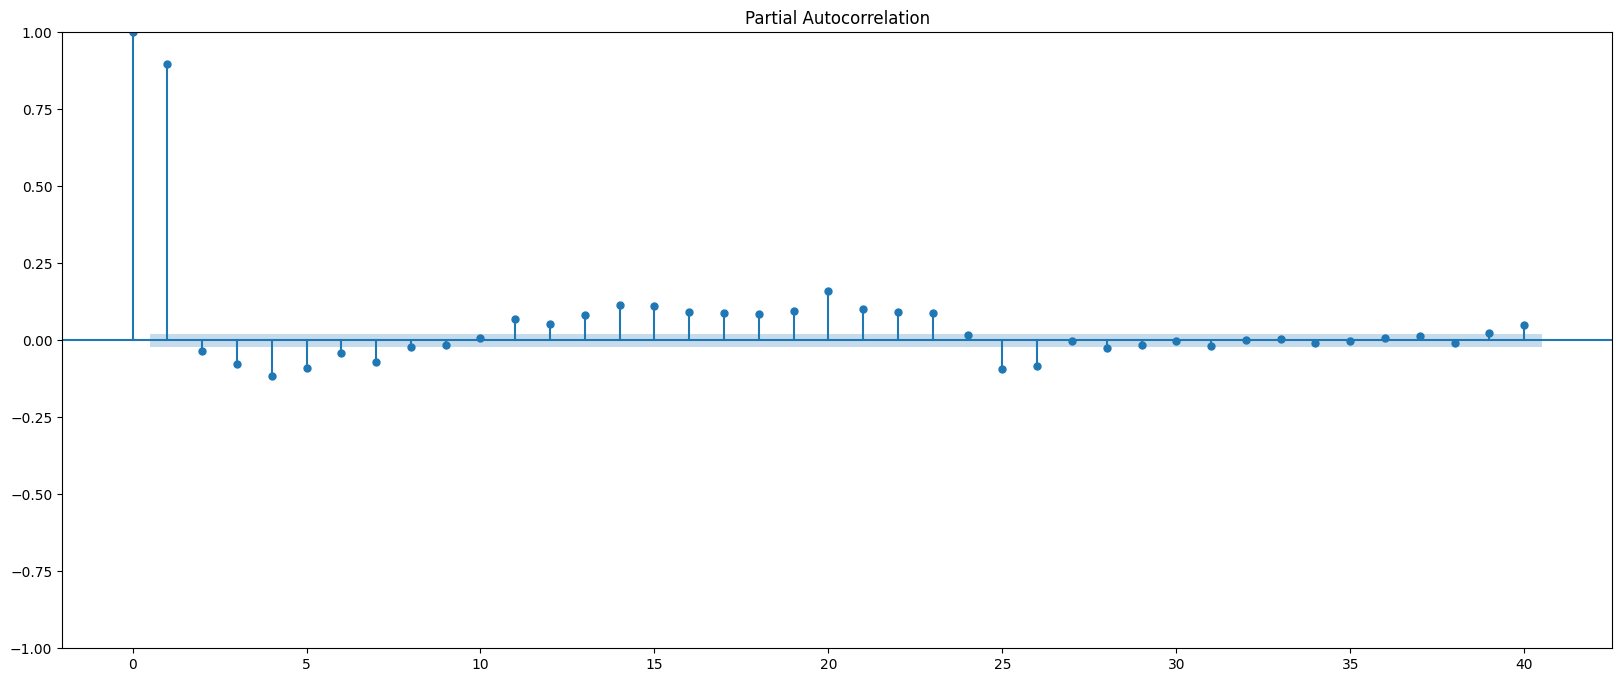

In [63]:
plot_acf(df_train_ce["Taux d'occupation"])
plot_pacf(df_train_ce["Taux d'occupation"])

In [66]:
result = adfuller(df_train_ce["Taux d'occupation"])
print('p-value : ', result[1])

result = adfuller(df_train_ce["Taux d'occupation"].diff().dropna())
print('p-value : ', result[1])

result = adfuller(df_train_ce["Taux d'occupation"].diff().diff().dropna())
print('p-value : ', result[1])

p-value :  2.9689662702899984e-11
p-value :  0.0
p-value :  0.0


- on choisit d = 0 d'après le test statistique précédent
- on choisit p = 1 comme le premier lag du PACF est le plus significatif
- on choisit q  = 8 comme il y a 8 lags en dehors de la bande de significance de l'ACF
- on choisit m = 24 pour la saisonalité

In [ ]:
arima_model = ARIMA(df_train_ce["Taux d'occupation"],order=(1,0,8))
